Importing the packages

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2 as cv

In [53]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [54]:
train_dir="/content/drive/MyDrive/DISEASEDATASET/train/flip"
test_dir="/content/drive/MyDrive/DISEASEDATASET/test/flip"

Importing the dataset directory

In [55]:
class_names=['BUMPS','HAIR LOSS','HOT SPOTS','RASHES','SORES']

Generating the Dataset to input it as the model

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator()
test_datagen= ImageDataGenerator()
train_gen=train_datagen.flow_from_directory(train_dir,target_size=(128,128),batch_size=3)
val_gen=test_datagen.flow_from_directory(test_dir,target_size=(128,128),batch_size=1)

Found 469 images belonging to 5 classes.
Found 101 images belonging to 5 classes.


Importing the packages for creating the cnn model

In [57]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Input

In [58]:
inputs = Input(shape=[128,128,3])

convo1=Conv2D(128,kernel_size=(3,3), padding="same",activation='relu',use_bias=True)(inputs)
convo1_pooling=MaxPooling2D((2, 2))(convo1)

convo2=(Conv2D(64, (3, 3), activation='relu',use_bias=True))(convo1_pooling)
convo2_pooling=(MaxPooling2D((2, 2)))(convo2)

convo3=(Conv2D(32, (3, 3), activation='relu',use_bias=True))(convo2_pooling)
convo3_pooling=(MaxPooling2D((2, 2)))(convo3)

convo4=(Conv2D(128, (3, 3), activation='relu',use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.001)))(convo3_pooling)
convo4_pooling=(MaxPooling2D((2, 2)))(convo4)

flatten=layers.Flatten()(convo4_pooling)

hidden1=layers.Dense(256,activation='relu')(flatten)
hidden2=layers.Dense(128,activation='relu')(hidden1)
hidden3=layers.Dense(64,activation='relu')(hidden2)
concat_1=keras.layers.Concatenate()([hidden1,hidden3])
hidden4=layers.Dense(32,activation='relu')(concat_1)
hidden5=layers.Dense(64,activation='relu')(hidden4)
concat_2=keras.layers.Concatenate()([hidden4,hidden5])
hidden6=layers.Dense(128,activation='relu')(concat_2)
concat_3=keras.layers.Concatenate()([hidden2,hidden6])
hidden7=layers.Dense(64,activation='relu')(concat_3)
hidden8=layers.Dense(32,activation='relu')(hidden7)
output=layers.Dense(5,activation='softmax')(hidden8)
model=keras.models.Model(inputs=[inputs],outputs=[output])

In [59]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 128, 128, 128)        3584      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 128)          0         ['conv2d_4[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_5 (Conv2D)           (None, 62, 62, 64)           73792     ['max_pooling2d_4[0][0]'

Compiling the model

In [60]:
from tensorflow.keras import optimizers
#from keras.optimizers import Adam
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [61]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("Bestmodel.h5",save_best_only=True)

In [62]:
early_stop=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [63]:
model_history=model.fit(train_gen,steps_per_epoch=30,epochs=100,validation_data=val_gen,validation_steps=15,callbacks=[checkpoint_cb])

Epoch 1/100
30/30 [==============================] - 11s 279ms/step - loss: 2.2252 - acc: 0.3111 - val_loss: 2.0243 - val_acc: 0.2667
Epoch 2/100
30/30 [==============================] - 9s 307ms/step - loss: 1.6460 - acc: 0.3000 - val_loss: 1.9330 - val_acc: 0.3333
Epoch 3/100
30/30 [==============================] - 11s 377ms/step - loss: 1.7019 - acc: 0.3068 - val_loss: 1.6378 - val_acc: 0.3333
Epoch 4/100
30/30 [==============================] - 8s 266ms/step - loss: 1.7080 - acc: 0.2889 - val_loss: 2.0290 - val_acc: 0.2667
Epoch 5/100
30/30 [==============================] - 9s 310ms/step - loss: 1.6611 - acc: 0.3556 - val_loss: 1.7011 - val_acc: 0.1333
Epoch 6/100
30/30 [==============================] - 8s 281ms/step - loss: 1.5821 - acc: 0.3333 - val_loss: 1.9043 - val_acc: 0.2000
Epoch 7/100
30/30 [==============================] - 8s 260ms/step - loss: 1.6468 - acc: 0.2386 - val_loss: 1.5905 - val_acc: 0.4000
Epoch 8/100
30/30 [==============================] - 8s 268ms/step 

(0.0, 1.0)

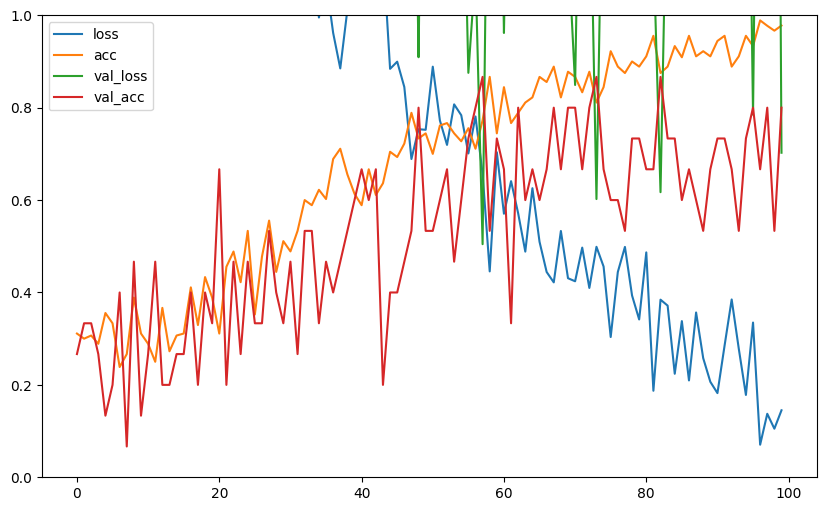

In [64]:
pd.DataFrame(model_history.history).plot(figsize=[10,6])
plt.gca().set_ylim(0,1)

Saving the model

In [65]:
#download_path = "/Home/Yuvanika/Downloads/AI"

In [66]:
model.save('/content/drive/MyDrive/widen.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing for an output

In [67]:
image = cv.imread('/content/drive/MyDrive/DISEASEDATASET/train/flip/HAIR LOSS/img9.jpg')

In [68]:
image.shape

(128, 128, 3)

In [69]:
from google.colab.patches import cv2_imshow

Resizing the user given input

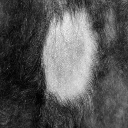

In [70]:
cv2_imshow(image)

In [71]:
def crop_resize(img):
  image_1_resize = cv.resize(img,(128,128))
  return image_1_resize

In [72]:
image=crop_resize(image)
image.shape

(128, 128, 3)

In [73]:
image = tf.expand_dims(image, axis=0)
image.shape.as_list()


[1, 128, 128, 3]

In [74]:
yproba = model.predict(image)
yproba

1/1 [==============================] - 0s 173ms/step


array([[7.3198685e-06, 9.9983275e-01, 1.5986059e-04, 1.6718043e-07,
        2.8719316e-09]], dtype=float32)

In [75]:
class_name=class_names[np.argmax(yproba,axis=1)[0]]

In [76]:
class_name

'HAIR LOSS'